This part of the notebook is devoted to the analysis of Bayesian optimization of  function 
$$\mathbf{y} = sin (x) * (1 + |x|) $$  I consider Bayesian optimization for two cases: optimizing the function without noise and optimizing the same function, but with noise that depends quadratically from the coordinate. And then I compare the results.

In [17]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
import  Functions
from Functions import *

Populating the interactive namespace from numpy and matplotlib


In [7]:
def f_with_noise(X):
     # target function  + heteroscadastic noise
    return np.sin (X) * (1 + np.abs (X)) + \
        0.5 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]

def f_without_noise(X):
    return np.sin (X) * (1 + np.abs (X))

draw these functions

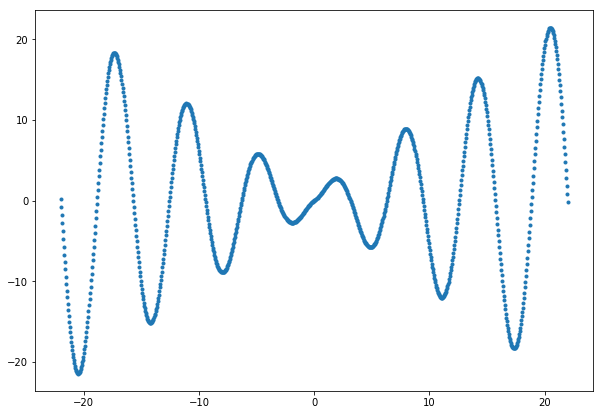

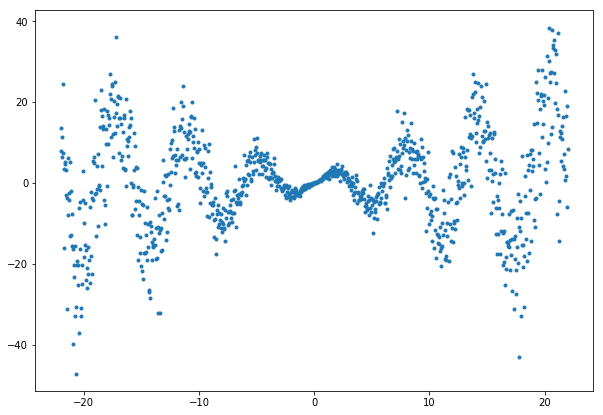

In [20]:
N = 1000
X = np.linspace(-22, 22, N)

y = f_without_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')

y = f_with_noise(X) 
pyplot.figure(figsize = (10, 7))
pyplot.plot(X, y, '.')


In [21]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-22, 22)}]  # problem constraints 

max_iter_for_func = 15 # evaluation budget

#increase the number of iterations for a noisy function
max_iter_for_noise_func = 30
max_time = 120   # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations


iter = 30

# four arrays for storing optimal values
x_opt_without_noise = np.array([])
x_opt_with_noise = np.array([])

y_opt_without_noise = np.array([])
y_opt_with_noise = np.array([])


for i in range(iter):
    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f = f_without_noise,# function to optimize       
                                                domain = bounds, # box-constraints of the problem
                                                acquisition_type = 'EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter_for_func, max_time, eps)     
    
    x_opt_without_noise = np.append (x_opt_without_noise, bayes_opt_without_noise.x_opt)
    y_opt_without_noise = np.append (y_opt_without_noise, bayes_opt_without_noise.fx_opt)
    
    
    
    bayes_opt_with_noise = GPyOpt.methods.BayesianOptimization(f=f_with_noise,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_noise.run_optimization(max_iter_for_noise_func, max_time, eps) 
    
    x_opt_with_noise = np.append (x_opt_with_noise, bayes_opt_with_noise.x_opt)
    y_opt_with_noise = np.append (y_opt_with_noise, bayes_opt_with_noise.fx_opt)
    
    


print 'x_opt_without_noise:\n', x_opt_without_noise, '\n'
print 'y_opt_without_noise:\n', y_opt_without_noise, '\n'

print 'x_opt_with_noise:\n', x_opt_with_noise, '\n'
print 'y_opt_with_noise:\n', y_opt_with_noise, '\n'


print "average x without noise = ", x_opt_without_noise.mean()
print "average x with noise = ", x_opt_with_noise.mean()
print "diff = ", np.abs (x_opt_without_noise.mean() - x_opt_with_noise.mean()), "\n"


print "average y without noise = ", y_opt_without_noise.mean()
print "average y with noise = ", y_opt_with_noise.mean()
print "diff = ", np.abs (y_opt_without_noise.mean() - y_opt_with_noise.mean()), "\n"
    
print "median x without noise = ", np.median (x_opt_without_noise)
print "median x with noise = ", np.median (x_opt_with_noise)
print "diff = ", np.abs (np.median (x_opt_without_noise) - np.median (x_opt_with_noise)), "\n"


print "median y without noise = ", np.median (y_opt_without_noise)
print "median y with noise = ", np.median (y_opt_with_noise)
print "diff = ", np.abs (np.median (y_opt_without_noise) - np.median (y_opt_with_noise)), "\n"
    

x_opt_without_noise:
[-20.45513509 -20.45705699 -20.56456284 -20.45324262  -7.9758572
  17.4059443   17.15767724  17.36062222  17.39705006 -20.5419878
  17.37845059  17.29720933 -20.51550773 -20.41186693  17.32447898
 -20.42739094 -20.52640485 -14.21219766 -14.18206142  17.35599588
  17.35592653 -20.55257141 -20.50905795  17.30685573  11.04528748
 -20.47436942  17.30194196  17.25937015 -20.4255331  -20.37923456] 

y_opt_without_noise:
[-21.44215769 -21.44260473 -21.34071537 -21.44163986  -8.90927754
 -18.25727805 -18.02473552 -18.29913481 -18.26848847 -21.38282509
 -18.28720097 -18.2940953  -21.41817442 -21.4110961  -18.30533083
 -21.42686015 -21.40546287 -15.16939838 -15.16676416 -18.30127226
 -18.3013013  -21.36445568 -21.42448925 -18.29963056 -12.03040618
 -21.44304749 -18.29702425 -18.25593795 -21.42524556 -21.36116456] 

x_opt_with_noise:
[-19.842322    18.11899594  16.69048383  17.07729348 -13.80297543
 -14.89695811 -14.39464058  17.07200224 -13.79106411 -15.38925873
 -14.7881500

In [12]:
print y_opt_with_noise

[-27.2262522  -29.62158296 -16.89705653 -30.54553935  -6.03158488
 -24.262734   -23.41438664 -15.48757431 -32.86643511 -17.4235732
 -22.0625554  -17.43450929 -23.76538696 -11.6248028  -15.45435258
 -19.98082029  -7.21974107 -31.12285014 -16.97057267 -16.44597446
 -26.09825713 -17.55178193 -32.34658532 -19.33642644 -17.21647609
 -22.46674328 -14.35272243 -16.39976181 -10.33554454 -34.58550334]


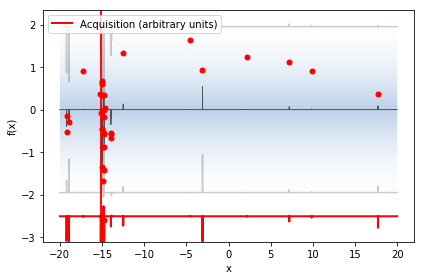

In [16]:
bayes_opt_with_noise.plot_acquisition()

We ran Bayesian optimization n times for a function without noise and function with heteroscadastic noise. And got n minimum for each function: $$y\_without\_noise_i,$$ 
                           $$y\_with\_noise_i,$$
                           $$i = 1, \ldots, n$$
Then for each of the two functions we calculate the deviation from the mean value:
    $$ \frac{1}{n} \sum_{i = 1}^n (y_i - y*)$$